# **Koronavirüs (Covid-19) Salgını - Türkiye'nin Durumu**

## Sayı: 31  (11 Mart 2021)

### **Hazırlayan:** Doğan Yiğit Yenigün (toUpperCase78)

**Her güne ait tüm sayısal veriler, Türkiye'de ilk vakanın görüldüğü 11 Mart'tan beri T. C. Sağlık Bakanlığı Covid-19 Bilgilendirme Sayfası'nda günlük olarak yayımlanan "Türkiye Günlük Koronavirüs Tablosu"ndan alınmaktadır.**

### **Referans:** [covid19.saglik.gov.tr](https://covid19.saglik.gov.tr/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
covid19TR = pd.read_csv('covid_19_Turkiye_2021_03_11.csv')

In [2]:
covid19TR = covid19TR.set_index('Tarih')
covid19TR['Günlük Vaka'] = covid19TR['Günlük Vaka'].fillna(0).astype(int)
covid19TR['Toplam Vaka'] = covid19TR['Toplam Vaka'].fillna(0).astype(int)
covid19TR['Toplam Test'] = covid19TR['Toplam Test'].fillna(0).astype(int)
covid19TR['Ağır Hasta'] = covid19TR['Ağır Hasta'].fillna(0).astype(int)
covid19TR['Hasta Artış'] = covid19TR['Toplam Hasta'].diff().fillna(0).astype(int)
covid19TR['Vefat Artış'] = covid19TR['Toplam Vefat'].diff().fillna(0).astype(int)
covid19TR['İyileşen Artış'] = covid19TR['Toplam İyileşen'].diff().fillna(0).astype(int)
covid19TR['Test Artış'] = covid19TR['Toplam Test'].diff().fillna(0).astype(int)
covid19TR['Hasta +/-'] = covid19TR['Hasta Artış'].diff().fillna(0.).astype(int)
covid19TR['Vefat +/-'] = covid19TR['Vefat Artış'].diff().fillna(0).astype(int)
covid19TR['İyileşen +/-'] = covid19TR['İyileşen Artış'].diff().fillna(0).astype(int)
covid19TR['Vaka +/-'] = covid19TR['Günlük Vaka'].diff().fillna(0).astype(int)
covid19TR['Test +/-'] = covid19TR['Test Artış'].diff().fillna(0).astype(int)

In [3]:
ind = 274
while covid19TR.iloc[ind,8] != 0:
    covid19TR.iloc[ind-1,9] = covid19TR.iloc[ind,9] - covid19TR.iloc[ind,8]
    ind -= 1

### **Son 20 Güne Dair Sayısal Bilgiler**

In [4]:
covid19TR[['Toplam Test', 'Toplam Vaka', 'Toplam Hasta', 'Toplam Vefat',
           'Toplam İyileşen', 'Zatürre Oranı(%)', 'Ağır Hasta', 'Günlük Vaka']].tail(20)

,Toplam Test,Toplam Vaka,Toplam Hasta,Toplam Vefat,Toplam İyileşen,Zatürre Oranı(%),Ağır Hasta,Günlük Vaka
Tarih,,,,,,,,
2021-02-20,32217077,2631876,687434,27983,2518758,3.6,1180,7857
2021-02-21,32318182,2638422,688035,28060,2523760,3.6,1185,6546
2021-02-22,32436998,2646526,688658,28138,2529450,4.2,1189,8104
2021-02-23,32560732,2655633,689291,28213,2534996,4.2,1185,9107
2021-02-24,32684747,2665194,689951,28285,2540293,4.2,1200,9561
2021-02-25,32811274,2674766,690609,28358,2546503,4.2,1192,9572
2021-02-26,32939661,2683971,691258,28432,2556785,4.2,1195,9205
2021-02-27,33065377,2693164,691879,28503,2565723,4.2,1187,9193
2021-02-28,33175016,2701588,692489,28569,2572234,4.2,1191,8424


**NOT 1:** 29 Temmuz 2020'den itibaren _Toplam Yoğun Bakım Sayısı_ ve _Toplam Entübe Hasta Sayısı_ yerine _Hastalarda Zatürre Oranı_ ve _Ağır Hasta Sayısı_ paylaşılmaya başlanmıştır. Buradaki _Ağır Hasta Sayısı,_ oksijen saturasyonu belli oranın altında veya yoğun bakım gerektiren hastalar için uluslararası tanımlamaya uygun olarak belirlenmektedir.

**NOT 2:** 25 Kasım 2020'den itibaren hasta sayısı üzerine semptomsuz olduğu halde PCR testi pozitif çıkanların da dahil edildiği _Günlük Vaka_ sayısı paylaşılmaya başlanmıştır.

**NOT 3:** Bu tablodaki _Toplam Hasta Sayısı,_ 10 Aralık 2020'den sonra Covid-19 Bilgilendirme Sayfası Günlük Tablosu'nda görünmemesine rağmen halen görünür olan _Günlük Hasta Sayısı_ sonraki günlerin üzerine eklenerek hesaplanmaktadır.

**NOT 4:** 10 Aralık 2020'den itibaren paylaşılan _Toplam Vaka_ sayısı, PCR testi pozitif çıkan tüm kişilerin toplamını göstermektedir.

**NOT 5:** 10 Aralık 2020'den önceki _Toplam Vaka Sayısı,_ mevcut gündeki toplam vaka sayısının günlük vaka sayısı ile farkı alınarak hesaplanmıştır (Günlük Vaka sayısının ilk açıklandığı 25 Kasım 2020'ye doğru geriye dönük gidilerek; yani elde edilen veri 24 Kasım 2020'ye kadardır).

**NOT 6:** _Toplam İyileşen_ sayısı, 12 Aralık 2020'den itibaren iyileşen hastalara ilaveten izolasyon süresi dolan vakaları da dahil etmektedir.

### **Covid-19 - Bir Yıl İçinde Türkiye'nin Durumu**

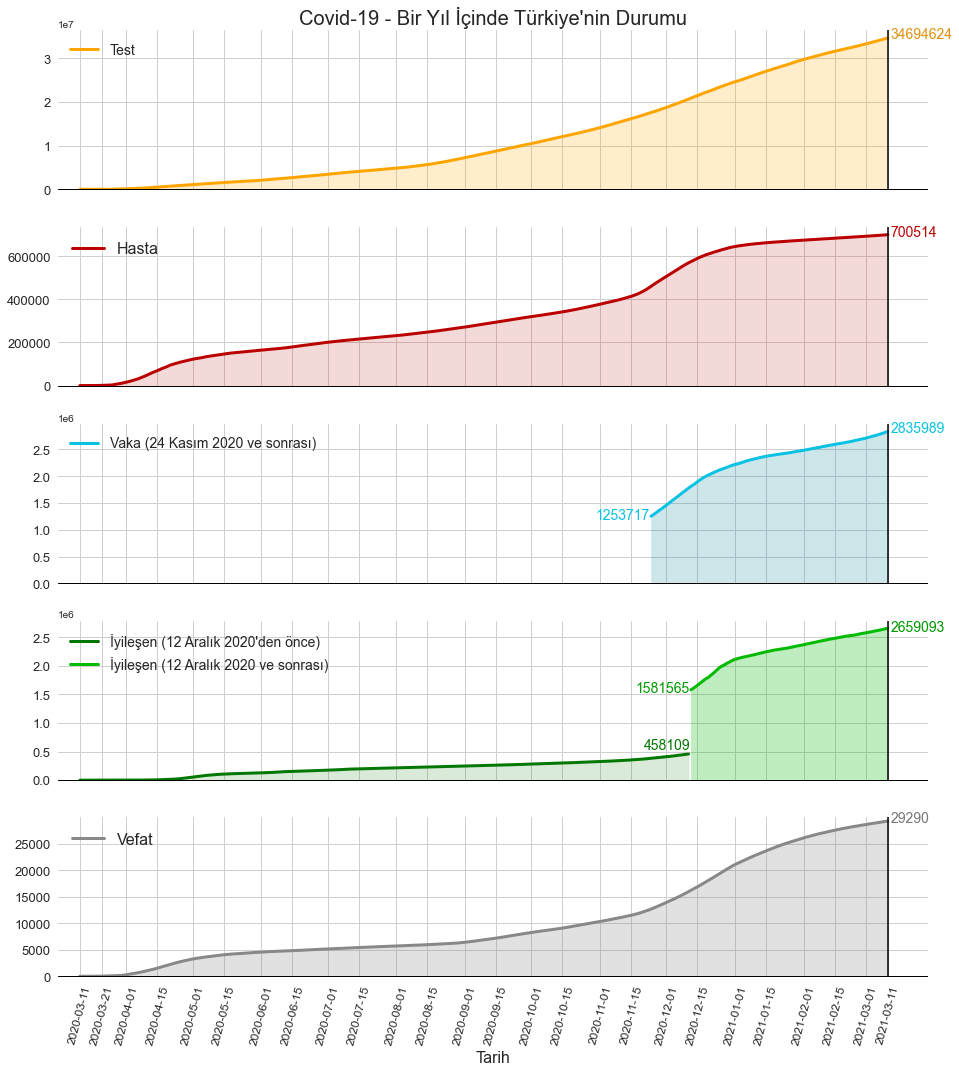

In [42]:
plt.style.use('seaborn')
plt.figure(figsize=(13.5,15), facecolor='white')
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['axes.edgecolor'] = '#eeeeee'
toplam_test = covid19TR['Toplam Test']
toplam_hasta = covid19TR['Toplam Hasta']
toplam_vaka = covid19TR['Toplam Vaka'][258:]
toplam_iyilesen_12ara_once = covid19TR['Toplam İyileşen'][:276]
toplam_iyilesen_12ara_sonra = covid19TR['Toplam İyileşen'][276:]
toplam_vefat = covid19TR['Toplam Vefat']
gunler = [0, 10, 21, 35, 51, 65, 82, 96, 112, 126, 143, 157, 174, 188, 204, 218, 235, 249, 265, 279, 296, 310, 327, 341,
          355, len(covid19TR)-1]
plt.subplot(5, 1, 1)
plt.axis([-10,len(covid19TR)+17,-250000,max(toplam_test)*1.05])
plt.plot(toplam_test, linewidth=3, color='orange', label='Test')
plt.fill_between(range(len(covid19TR)), toplam_test, color='orange', alpha=0.2)
plt.text(len(covid19TR)+0.25,toplam_test[-1]-20000, toplam_test[-1], color='#e09112', fontsize=14)
plt.axhline(0, color='k', linewidth=1)
plt.axvline(len(covid19TR)-1, color='k', linewidth=1.5)
plt.title('Covid-19 - Bir Yıl İçinde Türkiye\'nin Durumu', fontsize=20)
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.yticks(fontsize=13)
plt.grid(color='#cfcfcf')
plt.legend(loc='upper left', fontsize=14)
plt.subplot(5, 1, 2)
plt.axis([-10,len(covid19TR)+17,-7000,max(toplam_hasta)*1.05])
plt.plot(toplam_hasta, linewidth=3, color='#bb0000', label='Hasta')
plt.fill_between(range(len(covid19TR)), toplam_hasta, color='#bb0000', alpha=0.15)
plt.text(len(covid19TR)+0.25,toplam_hasta[-1]-8000, toplam_hasta[-1], color='#bb0000', fontsize=14)
plt.axhline(0, color='k', linewidth=1)
plt.axvline(len(covid19TR)-1, color='k', linewidth=1.5)
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.yticks(fontsize=13)
plt.grid(color='#cfcfcf')
plt.legend(loc='upper left', fontsize=16)
plt.subplot(5, 1, 3)
plt.axis([-10,len(covid19TR)+17,-7000,max(toplam_vaka)*1.05])
plt.plot(range(258, len(covid19TR)), toplam_vaka, linewidth=3, color='#09c2e3', label='Vaka (24 Kasım 2020 ve sonrası)')
plt.fill_between(range(258,len(covid19TR)), toplam_vaka, color='#068399', alpha=0.2)
plt.text(len(covid19TR)+0.25,toplam_vaka[-1]-8000, toplam_vaka[-1], color='#09c2e3', fontsize=14)
plt.text(233,toplam_vaka[0]-50000, toplam_vaka[0], color='#09c2e3', fontsize=14)
plt.axhline(0, color='k', linewidth=1)
plt.axvline(len(covid19TR)-1, color='k', linewidth=1.5)
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.yticks(fontsize=13)
plt.grid(color='#cfcfcf')
plt.legend(loc='upper left', fontsize=14)
plt.subplot(5, 1, 4)
plt.axis([-10,len(covid19TR)+17,-7000,max(toplam_iyilesen_12ara_sonra)*1.05])
plt.plot(toplam_iyilesen_12ara_once, linewidth=3, color='#007700', label='İyileşen (12 Aralık 2020\'den önce)')
plt.fill_between(range(len(covid19TR[:276])), toplam_iyilesen_12ara_once, color='#007700', alpha=0.15)
plt.plot(toplam_iyilesen_12ara_sonra, linewidth=3, color='#00bb00', label='İyileşen (12 Aralık 2020 ve sonrası)')
plt.fill_between(range(276,len(covid19TR)), toplam_iyilesen_12ara_sonra, color='#00bb00', alpha=0.25)
plt.axhline(0, color='k', linewidth=1)
plt.axvline(len(covid19TR)-1, color='k', linewidth=1.5)
plt.text(255, toplam_iyilesen_12ara_once[-1]+85000, toplam_iyilesen_12ara_once[-1], color='#007700', fontsize=14)
plt.text(len(covid19TR)+0.25, toplam_iyilesen_12ara_sonra[-1]-50000, toplam_iyilesen_12ara_sonra[-1], 
         color='#009900', fontsize=14)
plt.text(251, toplam_iyilesen_12ara_sonra[0]-50000, toplam_iyilesen_12ara_sonra[0], color='#009900', fontsize=14)
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.yticks(fontsize=13)
plt.grid(color='#cfcfcf')
plt.legend(loc='upper left', fontsize=14)
plt.subplot(5, 1, 5)
plt.axis([-10,len(covid19TR)+17,-200,max(toplam_vefat)+700])
plt.plot(toplam_vefat, linewidth=3, color='#888888', label='Vefat')
plt.fill_between(range(len(covid19TR)), toplam_vefat, color='#888888', alpha=0.25)
plt.axhline(0, color='k', linewidth=1)
plt.axvline(len(covid19TR)-1, color='k', linewidth=1.5)
plt.text(len(covid19TR)+0.25, toplam_vefat[-1]-300, toplam_vefat[-1], color='#777777', fontsize=14)
plt.xlabel('Tarih', fontsize=16)
plt.xticks(gunler, fontsize=12, rotation=75)
plt.yticks(fontsize=13)
plt.grid(color='#cfcfcf')
plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()
plt.show()

**Türkiye'nin bir yıldır sürdürdüğü Koronavirüs ile mücadelesinde yukarıdaki grafiklere bakıldığında;**

Toplam test sayısı **Ağustos 2020**'den sonra eğimin **yavaşça yükseldiği**, **Aralık 2020**'den itibaren de eğim **az daha** yükselerek **35 milyona doğru yaklaştığı** söylenebilir.

Hasta artışlarının yüksek olduğu zaman aralığı **Nisan 2020'nin başları ile sonları arasında**, takip eden aylarda ise neredeyse sabit bir şekilde arttığı görülebilmektedir. Ancak **Kasım 2020'nin ikinci yarısından sonra** yeniden hasta artış hızı yükselmiş ve sonrasında **gitgide yatay seyir şeklinde** yavaşlayarak **2021'de neredeyse sabit şekilde** ilerlemiştir. (Toplam hasta sayısının nasıl edildiği hakkında bilgi için yukarıdaki **NOT 3**'e bakınız)

Vaka sayıları (**NOT 5**'e bakınız) **Aralık 2020'nin ikinci yarısına** kadar sabit bir şekilde artmış, sonrasında **giderek yavaşlamış** olduğu ama son haftalarda **yeniden eğimin yükseldiği** görülmektedir.

İyileşen hızı, **Nisan 2020'nin sonları ile Mayıs 2020'nin ikinci yarısına** kadarki günlerde yüksek düzeyde seyretmiştir. 12 Aralık 2020 tarihine kadar bu sayı **500 bin**'e yaklaşmıştır. Bu tarihten sonra **izolasyon süresi dolan vakalar**ın da dahil edilmesiyle (yukarıdaki **NOT 6**'ya bakınız) sayıda bir anda sıçrama yaşanmıştır (1 milyonun üzerinde) ve grafiğe göre **2020'nin sonlarına doğru sabit** şekilde yükselmiş, sonrasında yavaşlamış ve **aynı seyirde** yükselişini sürdürmeye devam etmektedir.

Vefat sayısındaki eğim için başlarda **Nisan 2020 içinde** yüksek seyretmiş, **Mayıs 2020'den sonra** yavaşlamış, ama **Eylül 2020'den itibaren** yine giderek yükselmiştir ve bu eğim **Kasım 2020'nin ikinci yarısından sonra** artmaya devam etmiştir! **2021'in başından itibaren** ise **giderek yavaşlamaya** devam etmektedir.

### **Son 20 Güne Dair Hasta Sayısı Grafiği**

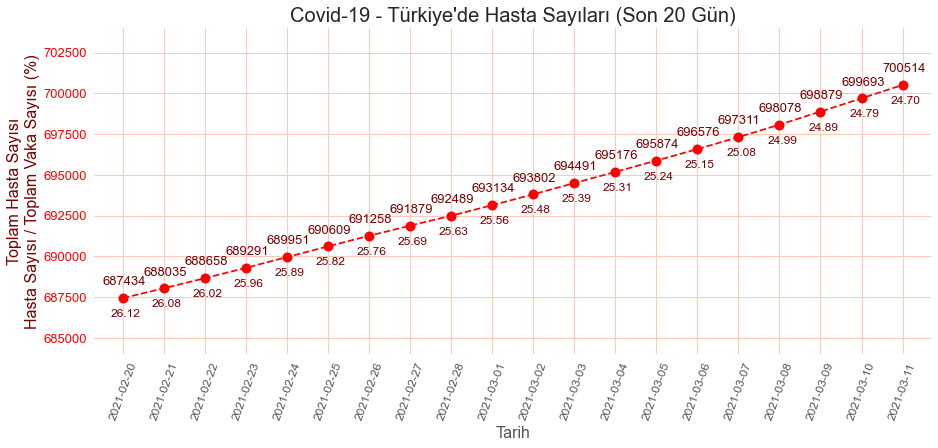

In [6]:
plt.figure(figsize=(15,6), facecolor='white')
toplam_hasta_son20 = covid19TR['Toplam Hasta'][-20:]
plt.plot(covid19TR.index[-20:], toplam_hasta_son20, marker='o', markersize=10, linestyle='--', color='r')
plt.axis([-0.7,19.7,min(toplam_hasta_son20)*0.995,max(toplam_hasta_son20)*1.005])
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='r', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.5), covid19TR.iloc[i,0]+800, covid19TR.iloc[i,0], fontsize=13, color='#770000')
    plt.text(i-(len(covid19TR)-19.7), covid19TR.iloc[i,0]-1150, "{:.2f}".format(covid19TR.iloc[i,0]/covid19TR.iloc[i,9]*100),
             fontsize=12, color='#770000')
plt.title('Covid-19 - Türkiye\'de Hasta Sayıları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam Hasta Sayısı\nHasta Sayısı / Toplam Vaka Sayısı (%)', fontsize=16, color='#770000')
plt.grid(color='#ffc9b5')
plt.show()

Toplam hasta sayısı grafikte görüldüğü üzere **700 bini** geçmiştir! Bu sayının toplam vaka sayısına oranı da 20 Şubat 2021'de **%26.21** olduğu görülürken, 11 Mart 2021'de **%24.70**'e kadar gerilemiştir.

### Son 20 Güne Dair Vaka Sayısı Grafiği

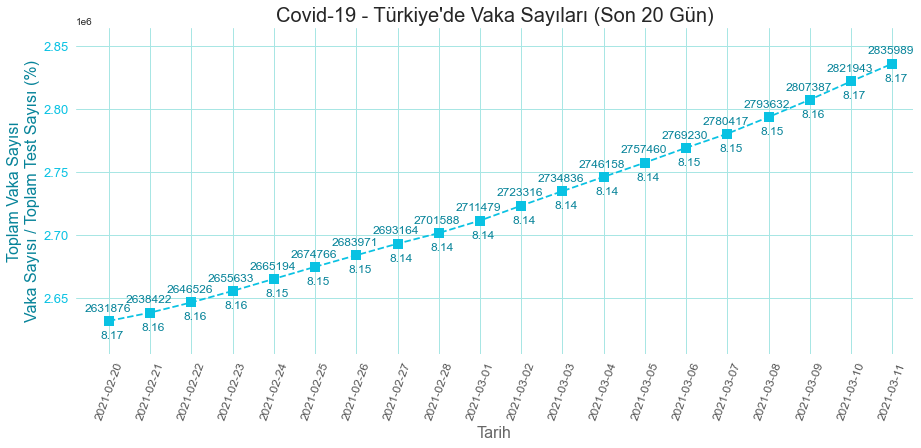

In [44]:
plt.figure(figsize=(15,6))
toplam_vaka_son20 = covid19TR['Toplam Vaka'][-20:]
plt.axis([-0.8,19.5,min(toplam_vaka_son20)*0.99,max(toplam_vaka_son20)*1.01])
plt.plot(covid19TR.index[-20:], covid19TR['Toplam Vaka'][-20:], marker='s', markersize=10, linestyle='--', color='#09c2e3')
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-len(covid19TR)+19.4, covid19TR.iloc[i,9]+7500, covid19TR.iloc[i,9], color='#068399', fontsize=12)
    plt.text(i-len(covid19TR)+19.8, covid19TR.iloc[i,9]-14000, "{:.2f}".format(covid19TR.iloc[i,9]/covid19TR.iloc[i,3]*100), 
             color="#068399", fontsize=12)
plt.title('Covid-19 - Türkiye\'de Vaka Sayıları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#666666')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.ylabel('Toplam Vaka Sayısı\nVaka Sayısı / Toplam Test Sayısı (%)', fontsize=16, color='#068399')
plt.yticks(fontsize=13, color='#09c2e3')
plt.grid(color='#a8e6e4')
plt.show()

**10 Aralık 2020**'den itibaren paylaşılmaya başlanan ve mevcut _Günlük Vaka_ sayıları ile geriye dönük hesaplamaları da dahil olunan (yukarıdaki **NOT 5**'e bakınız) _Toplam Vaka Sayılarına_ dair grafiğe göre en son 11 Mart 2021'de **2 milyon 835 bin 989** olarak gerçekleşmiştir. Bu sayının toplam test sayısına oranı, grafikte görüldüğü gibi **%8.14**'e kadar düşmüş olsa da en son **%8.17** olarak ölçülmüş ve yirmi gün önceki değerle aynı olmuştur.

### **Son 20 Güne Dair Vefat Sayısı Grafiği**

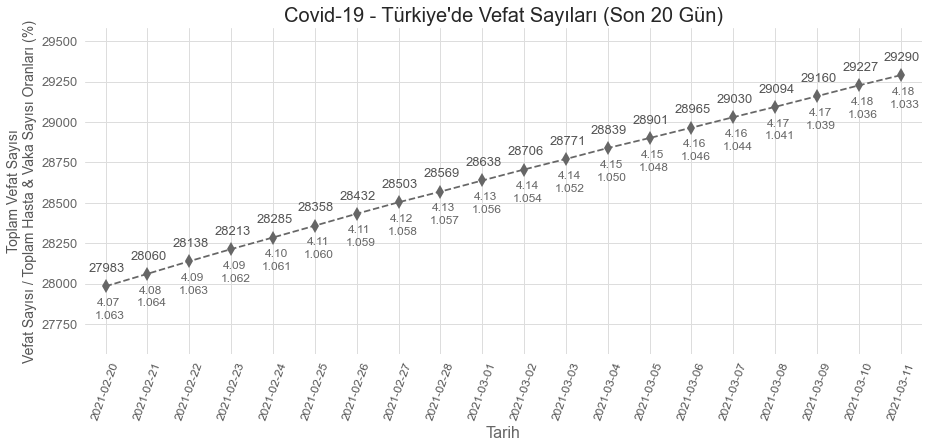

In [45]:
plt.figure(figsize=(15,6))
toplam_vefat_son20 = covid19TR['Toplam Vefat'][-20:]
plt.plot(covid19TR.index[-20:], toplam_vefat_son20, marker='d', markersize=10, linestyle='--', color='#666666')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#666666', fontsize=13)
plt.axis([-0.5,19.5,min(toplam_vefat_son20)*0.985,max(toplam_vefat_son20)*1.01])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.6), covid19TR.iloc[i,1]+90, covid19TR.iloc[i,1], fontsize=13, color='#555555')
    plt.text(i-(len(covid19TR)-19.8), covid19TR.iloc[i,1]-120, 
             "{:.2f}".format(covid19TR.iloc[i,1]/covid19TR.iloc[i,0]*100), fontsize=12, color='#666666')
    plt.text(i-(len(covid19TR)-19.74), covid19TR.iloc[i,1]-200, 
             "{:.3f}".format(covid19TR.iloc[i,1]/covid19TR.iloc[i,9]*100), fontsize=12, color='#666666')
plt.title('Covid-19 - Türkiye\'de Vefat Sayıları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#666666')
plt.ylabel('Toplam Vefat Sayısı\nVefat Sayısı / Toplam Hasta & Vaka Sayısı Oranları (%)', fontsize=14, color='#555555')
plt.grid(color='#dddddd')
plt.show()

Toplam vefat sayısı **29 bin 200**'ü geçmiştir! Bunun yanında toplam hasta sayısına oran, 20 Şubat 2021 tarihinde **%4.07**'de iken maalesef artmaya devam ederek 11 Mart 2021'de **%4.18**'e kadar ulaşmıştır! Toplam vaka sayısına göre oranlarda en son **%1.033**'lük oran görmekteyiz.

### **Son 20 Güne Dair İyileşen Sayısı Grafiği**

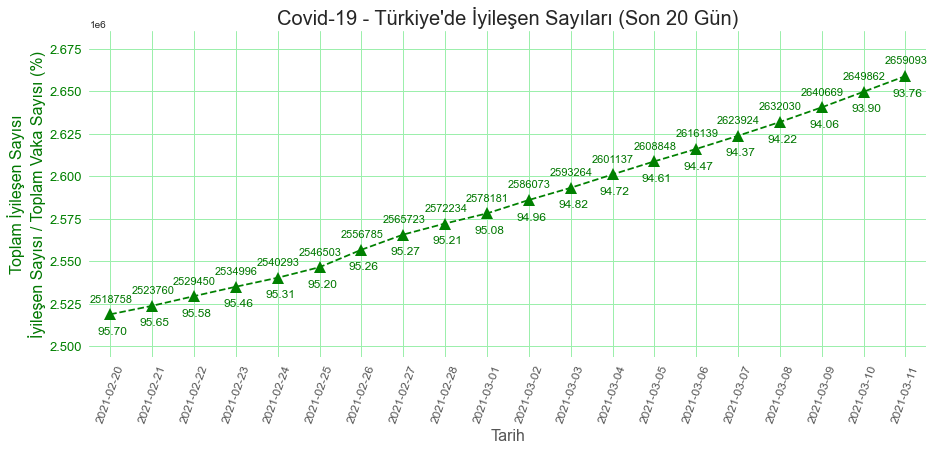

In [47]:
plt.figure(figsize=(15,6))
toplam_iyilesen_son20 = covid19TR['Toplam İyileşen'][-20:]
plt.plot(covid19TR.index[-20:], toplam_iyilesen_son20, marker='^', markersize=12, linestyle='--', color='g')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='g', fontsize=13)
plt.axis([-0.5,19.5,min(toplam_iyilesen_son20)*0.99,max(toplam_iyilesen_son20)*1.01])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.5), covid19TR.iloc[i,2]+7000, covid19TR.iloc[i,2], fontsize=11, color='#007700')
    plt.text(i-(len(covid19TR)-19.7), covid19TR.iloc[i,2]-12000, 
             "{:.2f}".format(covid19TR.iloc[i,2]/covid19TR.iloc[i,9]*100), fontsize=12, color='#007700')
plt.title('Covid-19 - Türkiye\'de İyileşen Sayıları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam İyileşen Sayısı\nİyileşen Sayısı / Toplam Vaka Sayısı (%)', fontsize=16, color='#007700')
plt.grid(color='#9cefac')
plt.show()

İyileşen hasta sayısı son olarak **2 milyon 659 bin**i geçmiştir. Bu sayının toplam vaka sayısına oran, **izolasyon süresi dolan vakaların** dahil edilmesiyle (yukarıdaki **NOT 6**'ya bakınız); en son 11 Mart 2021'de **%93.76**'ya kadar gerilemiştir!

### **Son Günlere Dair Günlük Hasta, Vaka, Vefat, İyileşen & Test Artışları İstatistikleri ve Dağılımları**

In [51]:
# Son 90 Gün - Hasta Artış, Vefat Artış ve Test Artış
round(covid19TR[['Hasta Artış', 'Vefat Artış', 'Test Artış', 'Günlük Vaka']][-90:].describe(), 2)

,Hasta Artış,Vefat Artış,Test Artış,Günlük Vaka
count,90.00,90.00,90.00,90.00
mean,1449.69,147.92,155390.80,11725.73
std,1307.43,66.09,27494.06,6262.80
min,601.00,62.00,101105.00,5277.00
25%,659.00,87.00,136004.75,7619.00
50%,739.00,135.50,150163.50,9371.00
75%,1513.25,196.25,179366.25,13992.00
max,5203.00,259.00,206190.00,32102.00


In [50]:
# 13 Aralık 2020 ve sonrası - İyileşen Artış (izolasyon süresi dolan vakalar dahil)
round(covid19TR['İyileşen Artış'][277:].describe(), 2)

count       89.00
mean     12107.06
std       8458.24
min       5002.00
25%       7217.00
50%       8211.00
75%      10282.00
max      35511.00
Name: İyileşen Artış, dtype: float64

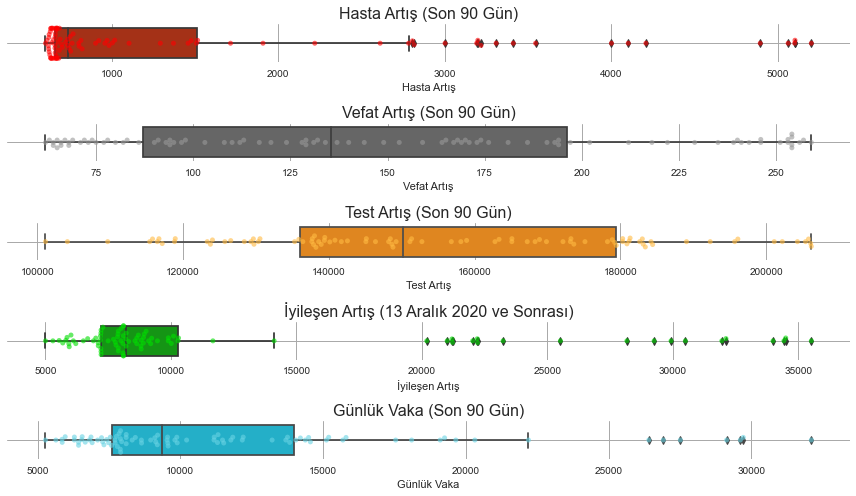

In [53]:
plt.figure(figsize=(12,7))
plt.subplot(5,1,1)
sns.boxplot(x='Hasta Artış', data=covid19TR[-90:], color='#bb2200')
sns.swarmplot(x='Hasta Artış', data=covid19TR[-90:], color='#ff0000', alpha=0.6)
plt.title('Hasta Artış (Son 90 Gün)', fontsize=16)
plt.grid(color='#aaaaaa')
plt.subplot(5,1,2)
sns.boxplot(x='Vefat Artış', data=covid19TR[-90:], color='#666666')
sns.swarmplot(x='Vefat Artış', data=covid19TR[-90:], color='#999999', alpha=0.6)
plt.title('Vefat Artış (Son 90 Gün)', fontsize=16)
plt.grid(color='#aaaaaa')
plt.subplot(5,1,3)
sns.boxplot(x='Test Artış', data=covid19TR[-90:], color='#ff8800')
sns.swarmplot(x='Test Artış', data=covid19TR[-90:], color='#ffba42', alpha=0.6)
plt.title('Test Artış (Son 90 Gün)', fontsize=16)
plt.grid(color='#aaaaaa')
plt.subplot(5,1,4)
sns.boxplot(x='İyileşen Artış', data=covid19TR[277:], color='#00aa00')
sns.swarmplot(x='İyileşen Artış', data=covid19TR[277:], color='#00dd00', alpha=0.6)
plt.title('İyileşen Artış (13 Aralık 2020 ve Sonrası)', fontsize=16)
plt.grid(color='#aaaaaa')
plt.subplot(5,1,5)
sns.boxplot(x='Günlük Vaka', data=covid19TR[-90:], color='#09c2e3')
sns.swarmplot(x='Günlük Vaka', data=covid19TR[-90:], color='#68d3e3', alpha=0.6)
plt.title('Günlük Vaka (Son 90 Gün)', fontsize=16)
plt.grid(color='#aaaaaa')
plt.tight_layout()
plt.show()

### Tüm Günler - Hasta, Vaka, Vefat & İyileşen Artış Sayıları + Sonraki Günlere Ait Tahminler

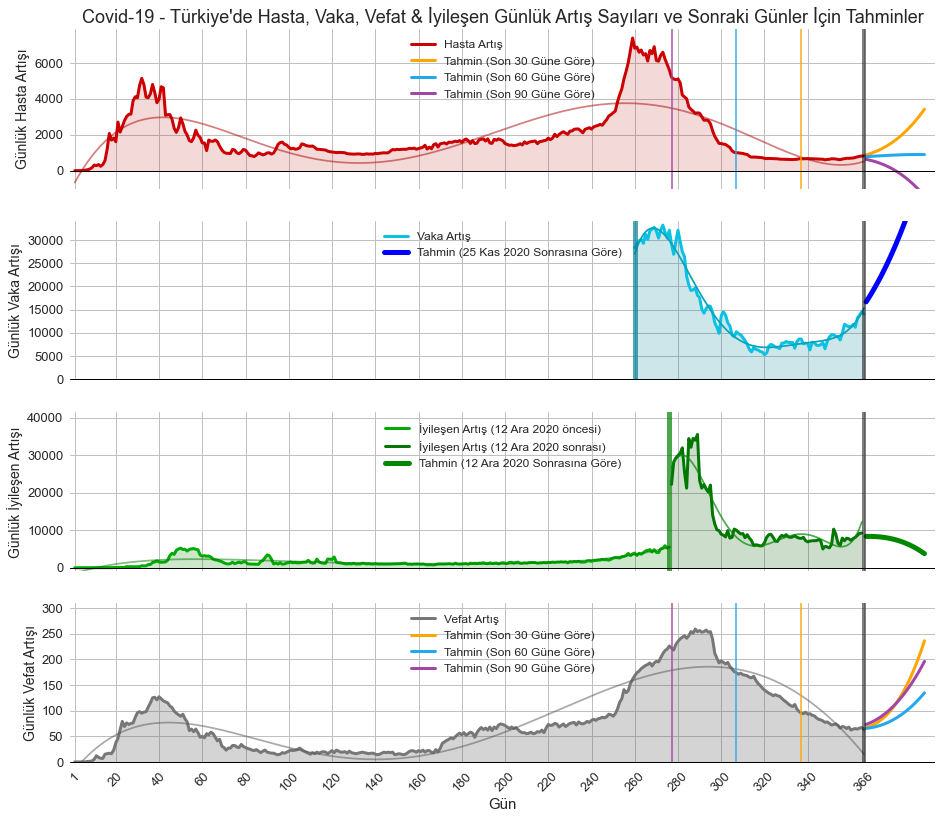

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
hasta_artis = covid19TR['Hasta Artış']
vefat_artis = covid19TR['Vefat Artış']
vaka_artis = covid19TR['Günlük Vaka'][259:]
iyilesen_artis_12ara_once = covid19TR['İyileşen Artış'][:276]
iyilesen_artis_12ara_sonra = covid19TR['İyileşen Artış'][277:]
gun_cizgiler = np.array([0, 19, 39, 59, 79, 99, 119, 139, 159, 179, 199, 219, 239, 259, 279, 299, 319, 339, len(covid19TR)-1])
gun_aralik_hasta_vefat = [30, 60, 90]
renk=['orange', '#23a8ed', '#a345a4']
y_pred_hasta_vefat = []
polynomial = PolynomialFeatures(degree=3)
linear = LinearRegression()
for s in range(1,3):
    y_pred = []
    for g in gun_aralik_hasta_vefat:
        if s == 1:     y = hasta_artis.values[len(covid19TR)-g:].reshape(-1,1)
        else:          y = vefat_artis.values[len(covid19TR)-g:].reshape(-1,1)
        x = np.array(list(range(len(y)))).reshape(-1,1)
        x_test = np.array(list(range(len(y), len(y)+28))).reshape(-1,1)
        x_poly = polynomial.fit_transform(x)
        x_test_poly = polynomial.fit_transform(x_test)
        linear.fit(x_poly, y)
        y_pred.append(linear.predict(x_test_poly))
    y_pred_hasta_vefat.append(y_pred)
y = iyilesen_artis_12ara_sonra.values.reshape(-1,1)
x = np.array(list(range(len(y)))).reshape(-1,1)
x_test_iyilesen = np.array(list(range(len(y), len(y)+28))).reshape(-1,1) 
x_poly = polynomial.fit_transform(x)
x_test_poly = polynomial.fit_transform(x_test_iyilesen)
linear.fit(x_poly, y)
y_pred_iyilesen = linear.predict(x_test_poly)
y = vaka_artis.fillna(0).values.reshape(-1,1)
x = np.array(list(range(len(y)))).reshape(-1,1)
x_test_vaka = np.array(list(range(len(y), len(y)+28))).reshape(-1,1)
x_poly = polynomial.fit_transform(x)
x_test_poly = polynomial.fit_transform(x_test_vaka)
linear.fit(x_poly, y)
y_pred_vaka = linear.predict(x_test_poly)
polynomial = PolynomialFeatures(degree=5)
poly_pred_hasta_vefat = []
for s in range(1,3): 
    if s == 1:    y = hasta_artis.fillna(0).values.reshape(-1,1)
    else:         y = vefat_artis.fillna(0).values.reshape(-1,1)
    x = np.array(list(range(len(y)))).reshape(-1,1)
    x_poly = polynomial.fit_transform(x)
    linear.fit(x_poly, y)
    poly_pred_hasta_vefat.append(linear.predict(x_poly))
poly_pred_iyilesen = []
for s in range(1,3):
    if s == 1:    y = iyilesen_artis_12ara_once.fillna(0).values.reshape(-1,1)
    else:         y = iyilesen_artis_12ara_sonra.fillna(0).values.reshape(-1,1)
    x = np.array(list(range(len(y)))).reshape(-1,1)
    x_poly = polynomial.fit_transform(x)
    linear.fit(x_poly, y)
    poly_pred_iyilesen.append(linear.predict(x_poly))
y = vaka_artis.fillna(0).values.reshape(-1,1)
x = np.array(list(range(len(y)))).reshape(-1,1)
x_poly = polynomial.fit_transform(x)
linear.fit(x_poly, y)
poly_pred_vaka = linear.predict(x_poly)
plt.figure(figsize=(15.5,13.5))
plt.subplot(4,1,1)
plt.title('Covid-19 - Türkiye\'de Hasta, Vaka, Vefat & İyileşen Günlük Artış Sayıları ve Sonraki Günler İçin Tahminler', 
          fontsize=18)
plt.plot(hasta_artis, color='#cc0000', linewidth=3, label='Hasta Artış')
plt.plot(poly_pred_hasta_vefat[0], color='#aa0000', alpha=0.5)
plt.fill_between(range(len(covid19TR)), hasta_artis, color='#bb0000', alpha=0.15)
plt.axis([-2, len(covid19TR)+32, -1000, hasta_artis.max()+500])
for i in range(len(gun_aralik_hasta_vefat)):
    plt.plot(x_test+len(covid19TR)-90, y_pred_hasta_vefat[0][i], color=renk[i], 
             label='Tahmin (Son ' + str(gun_aralik_hasta_vefat[i])  + ' Güne Göre)', linewidth=3)
    plt.axvline(x=len(covid19TR)-gun_aralik_hasta_vefat[i], alpha=0.8, color=renk[i])
plt.axvline(x=len(covid19TR)-1, color='k', linewidth=4, alpha=0.5)
plt.axhline(0, color='k', linewidth=1)
plt.xticks(gun_cizgiler, ['' for _ in range(len(gun_cizgiler))])
plt.yticks(fontsize=13)
plt.ylabel('Günlük Hasta Artışı', fontsize=14)
plt.grid(color='#c0c0c0')
plt.legend(loc='upper center', fontsize=12)
plt.subplot(4,1,2)
plt.axis([-2, len(covid19TR)+32, -200, vaka_artis.max()+1000])
plt.plot(range(259, len(covid19TR)), vaka_artis, color='#09c2e3', linewidth=3, label='Vaka Artış')
plt.fill_between(range(259,len(covid19TR)), vaka_artis, color='#068399', alpha=0.2)
plt.plot(range(259, len(covid19TR)), poly_pred_vaka, color='#07a3b9')
plt.plot(x_test_vaka+259, y_pred_vaka, color='blue', linewidth=5, label='Tahmin (25 Kas 2020 Sonrasına Göre)')
plt.axvline(259, color='#068399', linewidth=5, alpha=0.7)
plt.axvline(x=len(covid19TR)-1, color='k', linewidth=4, alpha=0.5)
plt.axhline(0, color='k', linewidth=1)
plt.xticks(gun_cizgiler, ['' for _ in range(len(gun_cizgiler))])
plt.yticks(fontsize=13)
plt.ylabel('Günlük Vaka Artışı', fontsize=14)
plt.grid(color='#c0c0c0')
plt.legend(loc='upper center', fontsize=12)
plt.subplot(4,1,3)
plt.axis([-2, len(covid19TR)+32, -1000, iyilesen_artis_12ara_sonra.max()+6000])
plt.plot(iyilesen_artis_12ara_once, color='#00aa00', linewidth=3, label='İyileşen Artış (12 Ara 2020 öncesi)')
plt.fill_between(range(len(covid19TR[:276])), iyilesen_artis_12ara_once, color='#008800', alpha=0.2)
plt.plot(poly_pred_iyilesen[0], color='#007700', alpha=0.5)
plt.plot(iyilesen_artis_12ara_sonra, color='#007700', linewidth=3, label='İyileşen Artış (12 Ara 2020 sonrası)')
plt.fill_between(range(276,len(covid19TR)-1), iyilesen_artis_12ara_sonra, color='#005500', alpha=0.2)
plt.plot(range(276,len(covid19TR)-1), poly_pred_iyilesen[1], color='#008800', alpha=0.7)
plt.plot(x_test_iyilesen+277, y_pred_iyilesen, color="#008800", linewidth=5, label='Tahmin (12 Ara 2020 Sonrasına Göre)')
plt.axvline(275, color='g', linewidth=5, alpha=0.7)
plt.axvline(x=len(covid19TR)-1, color='k', linewidth=4, alpha=0.5)
plt.axhline(0, color='k', linewidth=1)
plt.xticks(gun_cizgiler, ['' for _ in range(9)])
plt.ylabel('Günlük İyileşen Artışı', fontsize=14)
plt.yticks(fontsize=13)
plt.legend(loc='upper center', fontsize=12)
plt.grid(color='#c0c0c0')
plt.subplot(4,1,4)
plt.plot(vefat_artis, color='#777777', linewidth=3, label='Vefat Artış')
plt.plot(poly_pred_hasta_vefat[1], color='#555555', alpha=0.5)
plt.fill_between(range(len(covid19TR)), vefat_artis, color='#555555', alpha=0.25)
plt.axis([-2, len(covid19TR)+32, -2, vefat_artis.max()+50])
for i in range(len(gun_aralik_hasta_vefat)):
    plt.plot(x_test+len(covid19TR)-90, y_pred_hasta_vefat[1][i], color=renk[i], 
             label='Tahmin (Son ' + str(gun_aralik_hasta_vefat[i])  + ' Güne Göre)', linewidth=3)
    plt.axvline(x=len(covid19TR)-gun_aralik_hasta_vefat[i], alpha=0.8, color=renk[i])
plt.axvline(x=len(covid19TR)-1, color='k', linewidth=4, alpha=0.5)
plt.axhline(0, color='k', linewidth=1)
plt.xlabel('Gün', fontsize=15)
plt.xticks(gun_cizgiler, gun_cizgiler+1, fontsize=13, rotation=45)
plt.yticks(fontsize=13)
plt.ylabel('Günlük Vefat Artışı', fontsize=14)
plt.grid(color='#c0c0c0')
plt.legend(loc='upper center', fontsize=12)
plt.show()

_**ÖNEMLİ:** 12 Aralık 2020 gününe ait iyileşen artış sayısının 1 milyonun üzerinde çıkmasından dolayı tutarlılık açısından ilgili grafiğe dahil edilmemiştir!_

_Makine öğrenmesi yardımıyla_ gelecek haftalar için tahminlere baktığımızda;

* _Hasta_ sayısı için son 30 gün ele alındığında **giderek yükseleceği**; son 60 güne göre **neredeyse sabit devam edeceği** ve son 90 güne göre de önce **giderek azalacağı** ve **sıfırlanacağı**, 
* _Vaka_ sayısında 25 Kasım 2020'den sonraki veriler değerlendirildiğinde **giderek yükselmeye devam edeceği**,
* _İyileşen_ sayısında 12 Aralık 2020'den sonraki değerler göz önüne alındığında **hafif azalma olacağı**,
* _Vefat_ sayısı için son 30, 60 ve 90 güne bakıldığında hepsinde **giderek yükselme olacağı** öngörülmektedir.

### **Son 20 Gün İçindeki Hasta Sayısı Artışları**

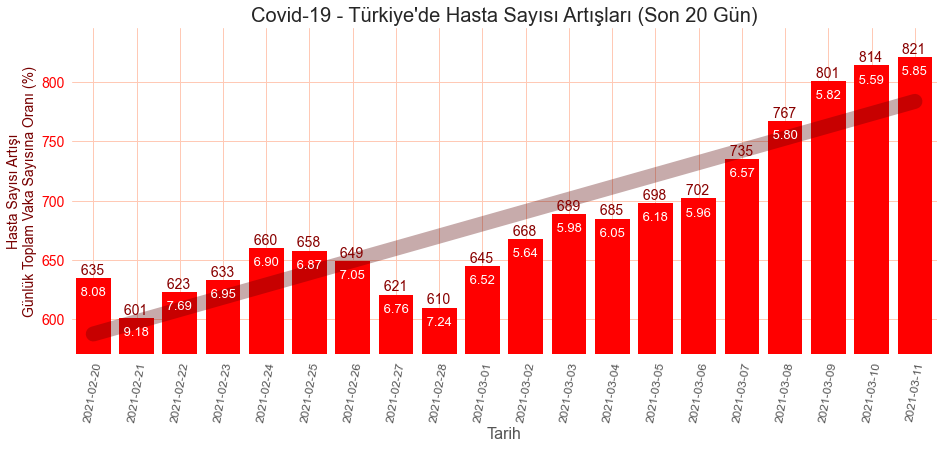

In [61]:
plt.figure(figsize=(15.5,6))
hasta_artis_son20 = covid19TR['Hasta Artış'][-20:]
slp, intcp = np.polyfit(list(range(20)), hasta_artis_son20, 1)
plt.bar(covid19TR.index[-20:], hasta_artis_son20, color='r')
plt.axis([-0.5,19.5,hasta_artis_son20.min()*0.95,hasta_artis_son20.max()*1.03])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='r', fontsize=14)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.62), covid19TR.iloc[i,10]+3, 
             "{:4}".format(int(covid19TR.iloc[i,10])), fontsize=14, color='#880000')
    plt.text(i-(len(covid19TR)-19.62), covid19TR.iloc[i,10]-15, 
             "{:5.2f}".format(round(covid19TR.iloc[i,10] / covid19TR.iloc[i,8] * 100, 2)), fontsize=13, color='white')
plt.plot([0, 19],[intcp, intcp+(slp*19)], color='#550000', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de Hasta Sayısı Artışları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Hasta Sayısı Artışı\nGünlük Toplam Vaka Sayısına Oranı (%)', fontsize=14, color='#770000')
plt.grid(color='#ffc9b5')
plt.show()

Son 20 günün hasta sayıları incelendiğinde; en yüksek sayı **821 ile 11 Mart 2021**'de ölçülmüş olup, genel anlamda **yukarıya doğru** yükselmeler gözlemlenmiştir! 

Günlük toplam vaka sayısına oranlar ise **%5.5-9.2** arasında değişen değerler almaktadır ve en yüksek çıkan tarih ise **%9.18** ile 21 Şubat 2021'dir.

### Son 20 Gün İçindeki Günlük Vaka Sayısı

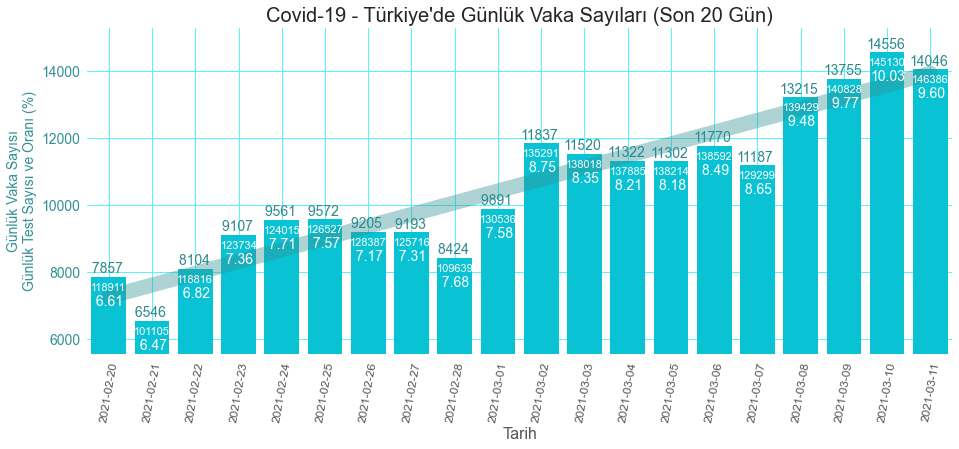

In [63]:
plt.figure(figsize=(15.5,6))
gunluk_vaka_son20 = covid19TR['Günlük Vaka'][-20:]
slp, intcp = np.polyfit(list(range(20)), gunluk_vaka_son20, 1)
plt.bar(covid19TR.index[-20:], gunluk_vaka_son20, color='#09c2d3')
plt.axis([-0.5,19.5,gunluk_vaka_son20.min()*0.85,gunluk_vaka_son20.max()*1.05])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#339196', fontsize=14)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.52), covid19TR.iloc[i,8]+120, 
             "{:5}".format(int(covid19TR.iloc[i,8])), fontsize=14, color='#2e8a8d')
    plt.text(i-(len(covid19TR)-19.58), covid19TR.iloc[i,8]-400, int(covid19TR.iloc[i,13]), fontsize=11, color='white')
    plt.text(i-(len(covid19TR)-19.62), covid19TR.iloc[i,8]-850, 
            "{:5.2f}".format(covid19TR.iloc[i,8] / covid19TR.iloc[i,13] * 100), fontsize=14, color='white')
plt.plot([0, 19],[intcp, intcp+(slp*19)], color='#339196', linewidth=15, alpha=0.4)
plt.title('Covid-19 - Türkiye\'de Günlük Vaka Sayıları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Günlük Vaka Sayısı\nGünlük Test Sayısı ve Oranı (%)', fontsize=14, color='#339196')
plt.grid(color='#56f4fc')
plt.show()

Son 20 günün vaka sayıları incelendiğinde, en çok pozitif vaka **14556 ile 10 Mart 2021**'de ve en az **6546 ile 21 Şubat 2021**'de görülmüştür. Günlük test sayısına oranlar ise genelde **%6.5-10.0** arasında devam ettiği gözlemlenirken, son dört günde bu oran **%9**'un üzerindedir!

### **Son 20 Gün İçindeki Vefat Sayısı Artışları**

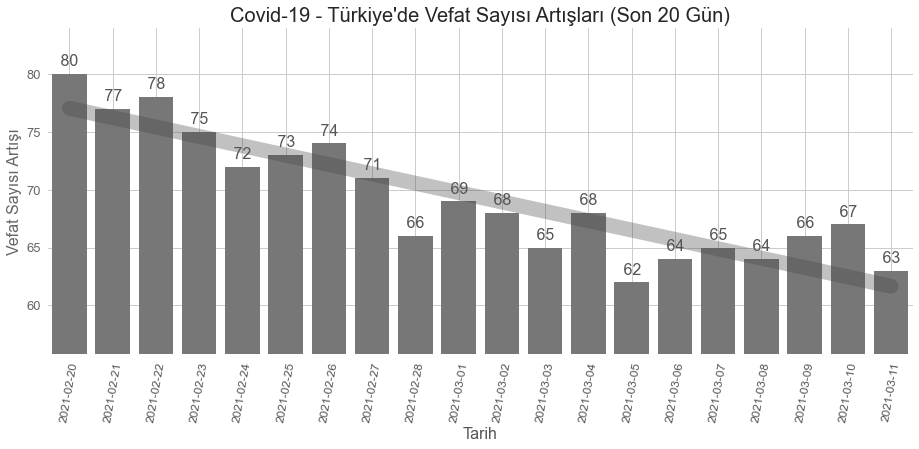

In [64]:
plt.figure(figsize=(15.5,6))
vefat_artis_son20 = covid19TR['Vefat Artış'][-20:]
slp, intcp = np.polyfit(list(range(20)), vefat_artis_son20, 1)
plt.bar(covid19TR.index[-20:], vefat_artis_son20, color='#777777')
plt.axis([-0.5,19.5,vefat_artis_son20.min()*0.9,vefat_artis_son20.max()*1.05])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#666666', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.7), covid19TR.iloc[i,11]+0.7, 
             "{:3}".format(int(covid19TR.iloc[i,11])), fontsize=16, color='#555555')
plt.plot([0, 19], [intcp, intcp+(slp*19)], color='#444444', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de Vefat Sayısı Artışları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vefat Sayısı Artışı', fontsize=16, color='#666666')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün vefat sayılarına bakıldığında, **20 Şubat 2021**'de sayı **80** iken, genel anlamda düşüş eğilimi göstererek en düşük sayı **62** ile **5 Mart 2021**'de ulaşılmıştır. En son **11 Mart 2021**'de bu sayı **63** olarak açıklanmıştır.

### **Son 2 Hafta İçindeki İyileşen Sayısı Artışları**

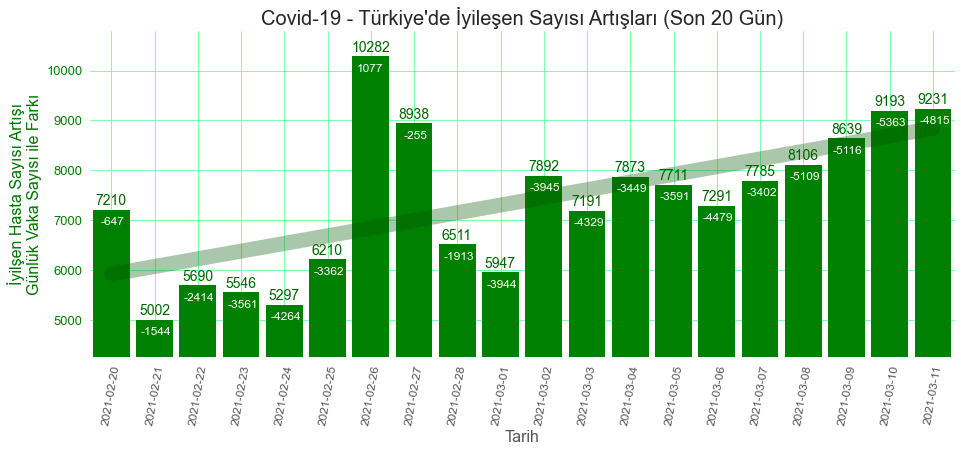

In [65]:
plt.figure(figsize=(15.5,6))
index = covid19TR['İyileşen Artış'][-20:].index
iyilesen_artis = covid19TR['İyileşen Artış'][-20:]
gunluk_vaka = covid19TR['Günlük Vaka'][-20:]
slp, intcp = np.polyfit(list(range(20)), iyilesen_artis, 1)
plt.bar(index, iyilesen_artis, color='g', width=0.85)
plt.axis([-0.5,19.5,iyilesen_artis.min()*0.85,iyilesen_artis.max()*1.05])
plt.xticks(index, rotation=80, fontsize=12, color='#555555')
plt.yticks(color='g', fontsize=13)
for i in range(len(iyilesen_artis)):
    if iyilesen_artis[i] >= 10000:    sh = 0.44
    else:    sh = 0.36
    plt.text(i-sh, iyilesen_artis[i]+100, int(iyilesen_artis[i]), fontsize=14, color='#006600')
    if abs(iyilesen_artis[i] - gunluk_vaka[i]) >= 10000:    sh = 0.39
    elif abs(iyilesen_artis[i] - gunluk_vaka[i]) >= 1000:   sh = 0.32
    elif abs(iyilesen_artis[i] - gunluk_vaka[i]) >= 100:    sh = 0.25
    else:    sh = 0.17
    plt.text(i-sh, iyilesen_artis[i]-300, int(iyilesen_artis[i] - gunluk_vaka[i]), fontsize=12, color='white')
plt.plot([0, 19], [intcp, intcp+(slp*19)], color='#005500', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de İyileşen Sayısı Artışları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('İyilşen Hasta Sayısı Artışı\nGünlük Vaka Sayısı ile Farkı', fontsize=16, color='#007700')
plt.grid(color='#7cffac')
plt.show()

Günlük iyileşen hasta sayısı, 12 Aralık 2020'de **izolasyon süresi dolan vakaların** da dahil edilmesinden sonra (yukarıdaki **NOT 6**'ya bakınız), son 20 gün içinde en yüksek sayı **10282** ile **26 Şubat 2021**'de görülmüştür. Ancak sonraki günlerde **aşağı ve yukarı** yönlerde değişim göstermiş ve son dört gün **8000**'in üzerinde seyrettiği görülmüştür.

Bunun yanında, günlük vaka sayısına en yüksek fark, **artı(+) yönde 1077** ile **sadece tek tarih olan 26 Şubat 2021**'de, **eksi(-) yönde 5363** ile **10 Mart 2021**'de ölçülmüştür.

### **Son 20 Gün İçindeki Günlük İyileşen Sayısının Vaka Sayısına Oranı**

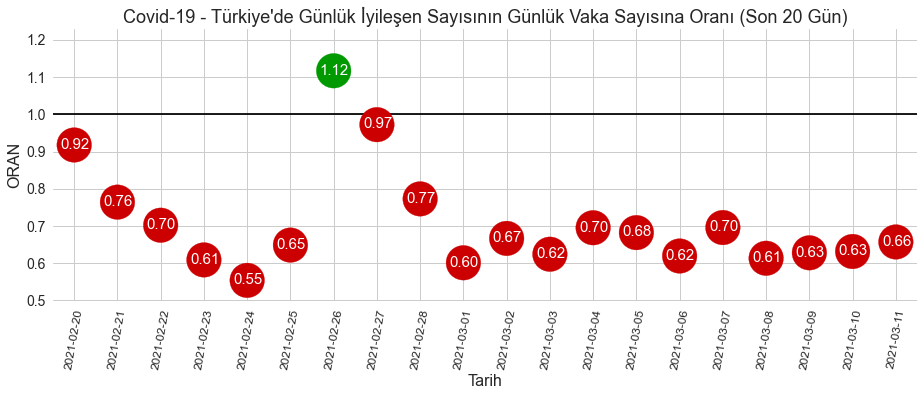

In [19]:
index = covid19TR['İyileşen Artış'][-20:].index
iyilesen_artis = covid19TR['İyileşen Artış'][-20:]
gunluk_vaka = covid19TR['Günlük Vaka'][-20:]
oranlar = iyilesen_artis / gunluk_vaka
colors = []
for i in range(20):
    if oranlar[i] < 1.0:    colors.append('#cc0000')
    else:    colors.append('#009900')
plt.figure(figsize=(15.5,5))
plt.axis([-0.5, 19.5, min(oranlar)*0.9, max(oranlar)*1.1])
plt.axhline(1.0, color='black', zorder=1)
plt.scatter(index, oranlar, marker="o", s=1200, color=colors, zorder=2)
for i in range(20):
    plt.text(i-0.32, oranlar[i]-0.01, "{:.2f}".format(round(oranlar[i], 2)), color='white', fontsize=15)
plt.title("Covid-19 - Türkiye\'de Günlük İyileşen Sayısının Günlük Vaka Sayısına Oranı (Son 20 Gün)", fontsize=18)
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('ORAN', fontsize=16)
plt.xticks(rotation=80, fontsize=12)
plt.yticks(fontsize=14)
plt.grid(color='#cccccc', zorder=0)
plt.show()

12 Aralık 2020'den sonra **izolasyon süresi dolan vakaların** da dahil edilmesinden sonra (yukarıdaki **NOT 6**'ya bakınız), son 20 gün içindeki günlük iyileşen sayısının günlük vaka sayısına oranlarda **1**'i geçen geçen tek tarih **26 Şubat 2021** olmuştur (**1.12**). Sonraki günlerde özellikle de **1 Mart 2021**'den sonra **0.6-0.7** arasında oranlar gözlemlenmiştir!

### **Tüm Günler Hasta/Vefat/İyileşen/Günlük Vaka Sayılarının Birbirleriyle İlişkileri ve Katsayıları**

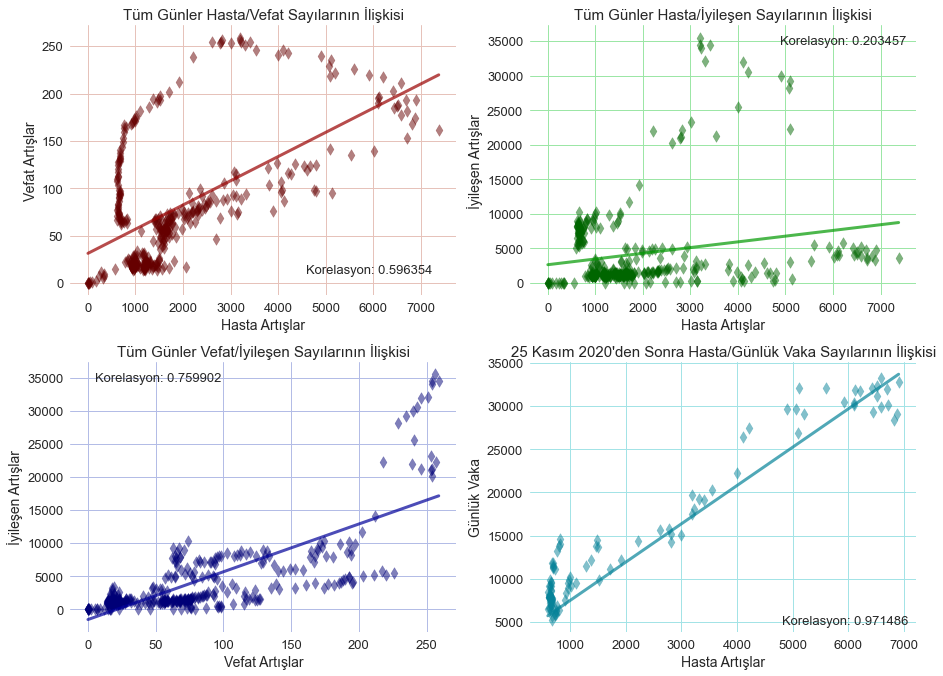

In [20]:
hasta_artis = covid19TR['Hasta Artış'][1:]
vefat_artis = covid19TR['Vefat Artış'][1:]
hasta_artis_12ara_haric = np.concatenate((covid19TR['Hasta Artış'][1:276].values,covid19TR['Hasta Artış'][277:].values))
iyilesen_artis_12ara_haric = np.concatenate((covid19TR['İyileşen Artış'][1:276].values,
                                             covid19TR['İyileşen Artış'][277:].values))
slp1, intcp1 = np.polyfit(hasta_artis,vefat_artis,1)
x1 = [0, hasta_artis.max()]
y1 = [intcp1+x1[0], intcp1+(slp1*x1[1])]
plt.figure(figsize=(13.5,9.5))
plt.subplot(2, 2, 1)
plt.plot(x1, y1, alpha=0.7, linewidth=3, color='#990000')
plt.scatter(hasta_artis, vefat_artis, marker='d', s=70, color='#660000', alpha=0.5)
plt.text(hasta_artis.max()-2800, 10,
         "Korelasyon: " + str(round(np.corrcoef(hasta_artis,vefat_artis)[0,1], 6)),
         fontsize=13)
plt.title('Tüm Günler Hasta/Vefat Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('Vefat Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#e6c2ba')
slp2, intcp2 = np.polyfit(hasta_artis_12ara_haric, iyilesen_artis_12ara_haric, 1)
x2 = [0, hasta_artis_12ara_haric.max()]
y2 = [intcp2+x2[0], intcp2+(slp2*x2[1])]
plt.subplot(2, 2, 2)
plt.scatter(hasta_artis_12ara_haric, iyilesen_artis_12ara_haric, marker='d', s=70, color='#006600', alpha=0.5)
plt.plot(x2, y2, alpha=0.7, linewidth=3, color='#009900')
plt.text(hasta_artis_12ara_haric.max()-2500, iyilesen_artis_12ara_haric.max()-1000,
        "Korelasyon: " + str(round(np.corrcoef(hasta_artis_12ara_haric, iyilesen_artis_12ara_haric)[0,1], 6)), fontsize=13)
plt.title('Tüm Günler Hasta/İyileşen Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('İyileşen Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#9ce6a6')
vefat_artis_12ara_haric = np.concatenate((covid19TR['Vefat Artış'][1:276].values,covid19TR['Vefat Artış'][277:].values))
slp3, intcp3 = np.polyfit(vefat_artis_12ara_haric, iyilesen_artis_12ara_haric, 1)
x3 = [0, vefat_artis_12ara_haric.max()]
y3 = [intcp3+x3[0], intcp3+(slp3*x3[1])]
plt.subplot(2, 2, 3)
plt.scatter(vefat_artis_12ara_haric, iyilesen_artis_12ara_haric, marker='d', s=70, color='#000077', alpha=0.5)
plt.plot(x3, y3, alpha=0.7, linewidth=3, color='#000099')
plt.text(vefat_artis_12ara_haric.min()+5, iyilesen_artis_12ara_haric.max()-1000,
         "Korelasyon: " + str(round(np.corrcoef(vefat_artis_12ara_haric, iyilesen_artis_12ara_haric)[0,1], 6)), fontsize=13)
plt.title('Tüm Günler Vefat/İyileşen Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Vefat Artışlar', fontsize=14)
plt.ylabel('İyileşen Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#b3bce6')
hasta_artis_25kas_sonra = covid19TR['Hasta Artış'][259:]
gunluk_vaka_25kas_sonra = covid19TR['Günlük Vaka'][259:]
slp4, intcp4 = np.polyfit(hasta_artis_25kas_sonra, gunluk_vaka_25kas_sonra, 1)
x4 = [hasta_artis_25kas_sonra.min(), hasta_artis_25kas_sonra.max()]
y4 = [intcp4, intcp4+(slp4*(x4[1]))]
plt.subplot(2, 2, 4)
plt.scatter(hasta_artis_25kas_sonra, gunluk_vaka_25kas_sonra, marker='d', s=70, color='#068399', alpha=0.5)
plt.title('25 Kasım 2020\'den Sonra Hasta/Günlük Vaka Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('Günlük Vaka', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(x4, y4, alpha=0.7, linewidth=3, color='#068399')
plt.text(hasta_artis_25kas_sonra.max()-2100, gunluk_vaka_25kas_sonra.min()-500,
         "Korelasyon: " + str(round(np.corrcoef(hasta_artis_25kas_sonra,gunluk_vaka_25kas_sonra)[0,1], 6)),
         fontsize=13)
plt.grid(color='#a3e3e6')
plt.tight_layout()
plt.show()

_**ÖNEMLİ:** 12 Aralık'a ait iyileşen artış sayısının 1 milyonun üzerinde çıkmasından dolayı tutarlılık açısından ilgili grafiklere dahil edilmemiştir!_

### **Son Günlere Dair Hasta, Vaka, Vefat & İyileşen Sayısı Değişimi İstatistikleri ve Dağılımları**

In [66]:
# Son 90 Gün - Hasta ve Vefat Sayısı Değişimleri
round(covid19TR[['Hasta +/-', 'Vefat +/-', 'Vaka +/-']][-90:].describe(),2)

,Hasta +/-,Vefat +/-,Vaka +/-
count,90.00,90.00,90.00
mean,-53.18,-1.81,-200.67
std,117.71,4.91,1251.78
min,-687.00,-27.00,-4215.00
25%,-50.25,-4.00,-767.75
50%,-9.00,-3.00,-195.50
75%,4.00,1.00,427.00
max,41.00,11.00,3818.00


In [22]:
# 14 Aralık 2020 ve Sonrası - İyileşen Hasta Sayısı Değişimi (izolasyon süresi dolan vakalar dahil)
round(covid19TR['İyileşen +/-'][278:].describe(), 2)

count       88.00
mean      -147.55
std       2585.09
min     -12280.00
25%       -690.50
50%        -94.50
75%        584.75
max      13201.00
Name: İyileşen +/-, dtype: float64

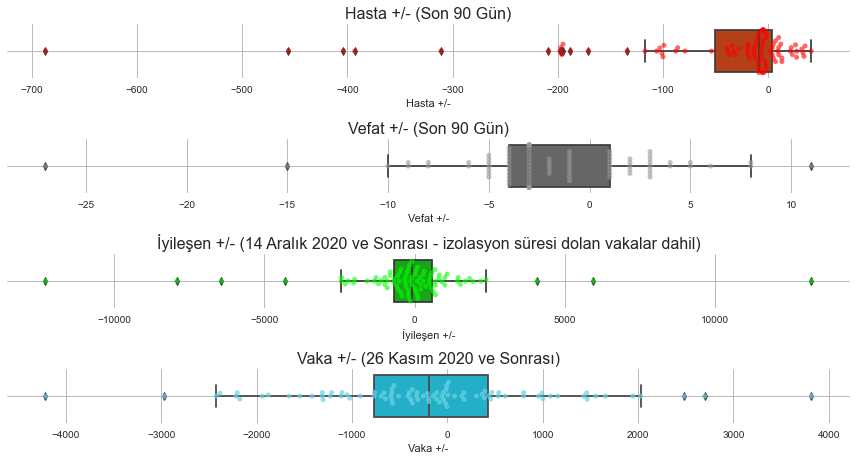

In [67]:
plt.figure(figsize=(12,6.5))
plt.subplot(4,1,1)
sns.boxplot(x='Hasta +/-', data=covid19TR[-90:], color='#cc3300')
sns.swarmplot(x='Hasta +/-', data=covid19TR[-90:], color='#ff0000', alpha=0.6)
plt.grid(color='#bbbbbb')
plt.title('Hasta +/- (Son 90 Gün)', fontsize=16)
plt.subplot(4,1,2)
sns.boxplot(x='Vefat +/-', data=covid19TR[-90:], color='#666666')
sns.swarmplot(x='Vefat +/-', data=covid19TR[-90:], color='#999999', alpha=0.6)
plt.grid(color='#bbbbbb')
plt.title('Vefat +/- (Son 90 Gün)', fontsize=16)
plt.subplot(4,1,3)
sns.boxplot(x='İyileşen +/-', data=covid19TR[278:], color='#00bb00')
sns.swarmplot(x='İyileşen +/-', data=covid19TR[278:], color='#00ff00', alpha=0.6)
plt.grid(color='#bbbbbb')
plt.title('İyileşen +/- (14 Aralık 2020 ve Sonrası - izolasyon süresi dolan vakalar dahil)', fontsize=16)
plt.subplot(4,1,4)
sns.boxplot(x='Vaka +/-', data=covid19TR[-90:], color='#09c2e3')
sns.swarmplot(x='Vaka +/-', data=covid19TR[-90:], color='#68d3e3', alpha=0.7)
plt.grid(color='#bbbbbb')
plt.title('Vaka +/- (26 Kasım 2020 ve Sonrası)', fontsize=16)
plt.tight_layout()
plt.show()

### **Son 20 Günün Hasta Sayısı Değişim Grafiği**

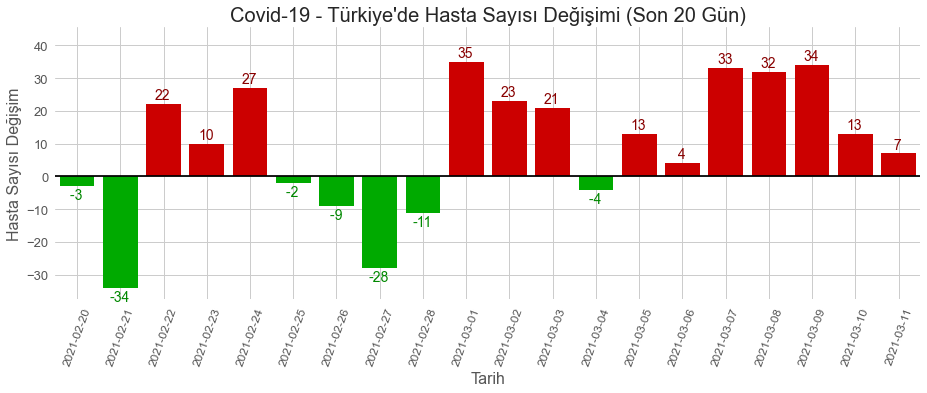

In [69]:
hasta_degisim = covid19TR['Hasta +/-'][-20:]
plt.figure(figsize=(15.5,5))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,14] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-20:], hasta_degisim, color=barc)
plt.axis([-0.5,19.5,min(hasta_degisim)*1.1,max(hasta_degisim)*1.3])
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,14] >= 0:
        plt.text(i-(len(covid19TR)-19.8), covid19TR.iloc[i,14]+1.5, 
                 "{:2}".format(int(covid19TR.iloc[i,14])), fontsize=14, color='#880000')
    else:
        plt.text(i-(len(covid19TR)-19.75), covid19TR.iloc[i,14]-4, 
                 "{:3}".format(int(covid19TR.iloc[i,14])), fontsize=14, color='#008800')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de Hasta Sayısı Değişimi (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Hasta Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün hasta sayısı değişimine baktığımızda, en çok **35** (1 Mart 2021) artış ve en çok da **34** (21 Şubat 2021) azalış gözlemlenmiştir. Hasta sayısı değişiminde son yirmi günün **yedisinde** düşüş olsa da, özellikle son yedi günde **artış** yaşanmıştır.

### Son 20 Günün Vaka Sayısı Değişim Grafiği

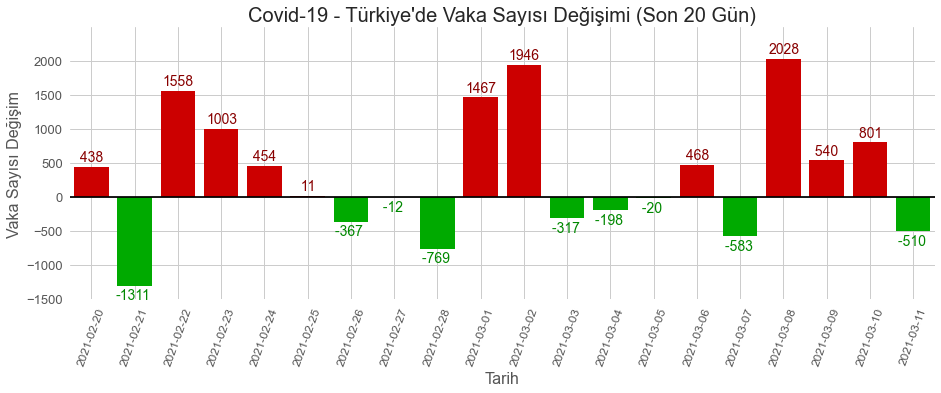

In [26]:
vaka_degisim = covid19TR['Vaka +/-'][-20:]
plt.figure(figsize=(15.5,5))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,17] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-20:], vaka_degisim, color=barc)
plt.axis([-0.5,19.5,min(vaka_degisim)*1.15,max(vaka_degisim)*1.23])
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,17] >= 0:
        plt.text(i-(len(covid19TR)-19.65), covid19TR.iloc[i,17]+80, 
                 "{:4}".format(int(covid19TR.iloc[i,17])), fontsize=14, color='#880000')
    else:
        plt.text(i-(len(covid19TR)-19.55), covid19TR.iloc[i,17]-200, 
                 "{:5}".format(int(covid19TR.iloc[i,17])), fontsize=14, color='#008800')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de Vaka Sayısı Değişimi (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vaka Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün vaka sayısı değişimi incelendiğinde, en çok **2028** artış (8 Mart 2021), ve en çok **1311** azalış (21 Şubat 2021) meydana gelmiştir. Bu değişimlerin daha çok **yukarı yönde** olduğu ve dört farklı günde **1400**'ten fazla artış olduğu görülmüştür.

### **Son 20 Günün Vefat Sayısı Değişim Grafiği**

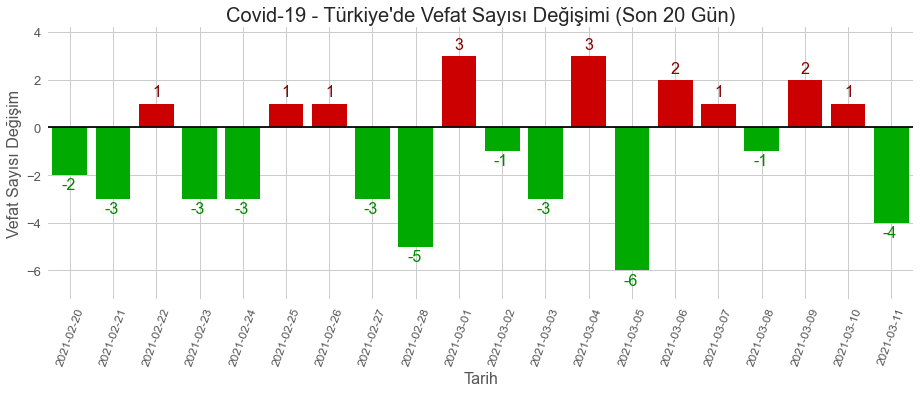

In [71]:
vefat_degisim = covid19TR['Vefat +/-'][-20:]
plt.figure(figsize=(15.5,5))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,15] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-20:], vefat_degisim, color=barc)
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
plt.axis([-0.5, 19.5, min(vefat_degisim)*1.2, max(vefat_degisim)*1.4])
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,15] >= 10:    sh = 19.8;   vsh = 0.3;   c = '#880000'
    elif covid19TR.iloc[i,15] >= 0:   sh = 19.9;   vsh = 0.3;   c = '#880000'
    else:    sh = 19.8;    vsh = -0.6;   c = '#008800'
    plt.text(i-(len(covid19TR)-sh), covid19TR.iloc[i,15]+vsh, int(covid19TR.iloc[i,15]), fontsize=16, color=c)
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de Vefat Sayısı Değişimi (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vefat Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Yukarıdaki grafiğe göre, vefat sayısı son 20 gün içinde, önceki güne kıyasla en fazla **3** yükselmiş (1 ve 4 Mart 2021) ve en fazla **6** azalmıştır (5 Mart 2021). Düşüşlerin **daha çok** olduğunu bu grafikte görebilmekteyiz.

### **Son 20 Günün İyileşen Sayısı Değişim Grafiği**

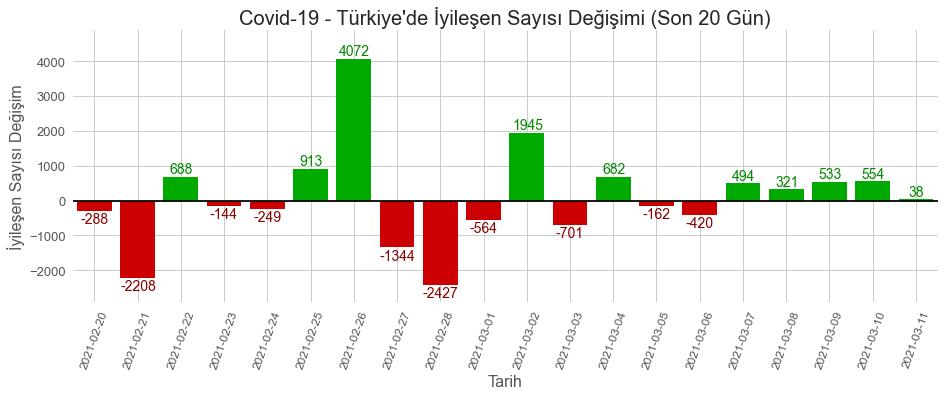

In [73]:
iyilesen_degisim = covid19TR['İyileşen +/-'][-20:]
index = covid19TR['İyileşen +/-'][-20:].index
plt.figure(figsize=(15.5,5))
barc = []
for i in range(20):
    if iyilesen_degisim[i] >= 0:
        barc.append('#00aa00')
    else:   barc.append('#cc0000')
plt.bar(index, iyilesen_degisim, color=barc)
plt.xticks(index, rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
plt.axis([-0.5, 19.5, min(iyilesen_degisim)*1.2, max(iyilesen_degisim)*1.2])
for i in range(20):
    if iyilesen_degisim[i] >= 0:
        if int(iyilesen_degisim[i]) >= 10000:    sh = 0.4
        elif int(iyilesen_degisim[i]) >= 1000:   sh = 0.34
        elif int(iyilesen_degisim[i]) >= 100:    sh = 0.25
        else:    sh = 0.18
        plt.text(i-sh, iyilesen_degisim[i]+100, int(iyilesen_degisim[i]), fontsize=14, color='#008800')
    else:
        if int(iyilesen_degisim[i]) <= -10000:    sh = 0.5
        elif int(iyilesen_degisim[i]) <= -1000:   sh = 0.4
        elif int(iyilesen_degisim[i]) <= -100:    sh = 0.33
        else:    sh = 0.25
        plt.text(i-sh, iyilesen_degisim[i]-350, int(iyilesen_degisim[i]), fontsize=14, color='#880000')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de İyileşen Sayısı Değişimi (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('İyileşen Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün iyileşen hasta sayısı değişiminde, en fazla artış **26 Şubat 2021**'de **4072** ile gerçekleşirken; en fazla düşüş **2427** ile **28 Şubat 2021**'de görülmüştür. Grafikte genel anlamda günlerin **yarısında** yükseliş ve diğer **yarısında** düşüş olduğunu görebilmekteyiz. Ancak değişim son **beş** günde **yukarı** yönde olsa da yüksek seviyede değildir.

### **Toplam Aktif Vaka Sayıları (Son 20 Gün)**

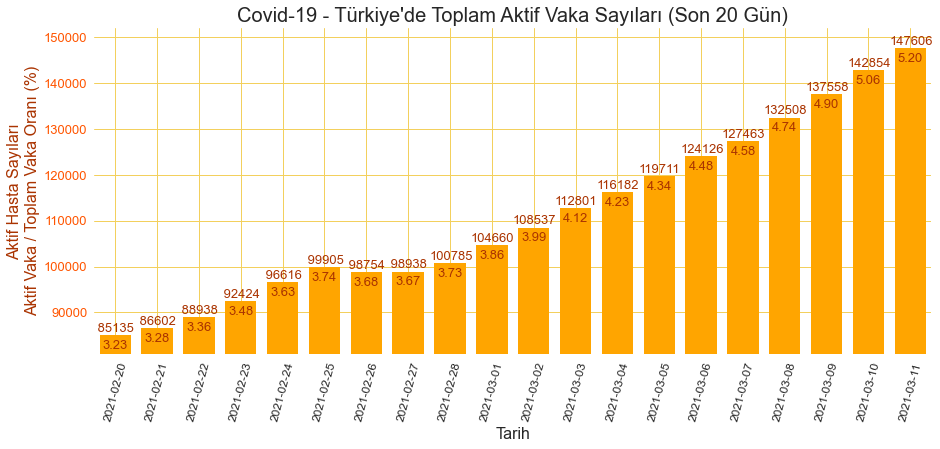

In [80]:
covid19TR['Toplam Aktif Vaka'] = covid19TR['Toplam Vaka'] - covid19TR['Toplam Vefat'] - covid19TR['Toplam İyileşen']
plt.figure(figsize=(15,6))
plt.bar(covid19TR.index[-20:], covid19TR['Toplam Aktif Vaka'][-20:], color='orange', width=0.75)
plt.axis([-0.5,19.5,covid19TR['Toplam Aktif Vaka'][-20:].min()*0.95,covid19TR['Toplam Aktif Vaka'][-20:].max()*1.03])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.5), covid19TR.iloc[i,19]+700, "{:6}".format(int(covid19TR.iloc[i,19])),
             fontsize=13, color='#aa3300')
    if covid19TR.iloc[i,19]/covid19TR.iloc[i,9]*100 >= 10:    sh = 19.6
    else:    sh = 19.7
    plt.text(i-(len(covid19TR)-19.7), covid19TR.iloc[i,19]-3000, 
             "{:.2f}".format(round(covid19TR.iloc[i,19]/covid19TR.iloc[i,9]*100, 2)), fontsize=13, color='#aa3300')
plt.xticks(rotation=75, fontsize=12)
plt.yticks(fontsize=13, color='#ff5500')
plt.title('Covid-19 - Türkiye\'de Toplam Aktif Vaka Sayıları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('Aktif Hasta Sayıları\nAktif Vaka / Toplam Vaka Oranı (%)', fontsize=16, color='#aa3300')
plt.grid(color='#f3d05d')
plt.show()

Son 20 günün toplam aktif vaka sayılarına baktığımızda, 20 Şubat 2021'de **85135** olarak ölçülmüş olup, 11 Mart 2021'de **147606**'ya kadar ulaşmıştır! 

Grafikte görüldüğü üzere özellikle **27 Şubat 2021** tarihinden sonra aktif vaka sayısının **sabit bir şekilde** arttığı açıkça ortaya çıkmaktadır.

Toplam vaka sayısına göre oranlar ise önceleri **%3.2** seviyelerinde olup en son 11 Mart 2021'de **%5.20**'ye kadar yükselmiştir!

### Son 4 Hafta için Hastalarda Zatürre Oranları ve Ağır Hasta Sayıları

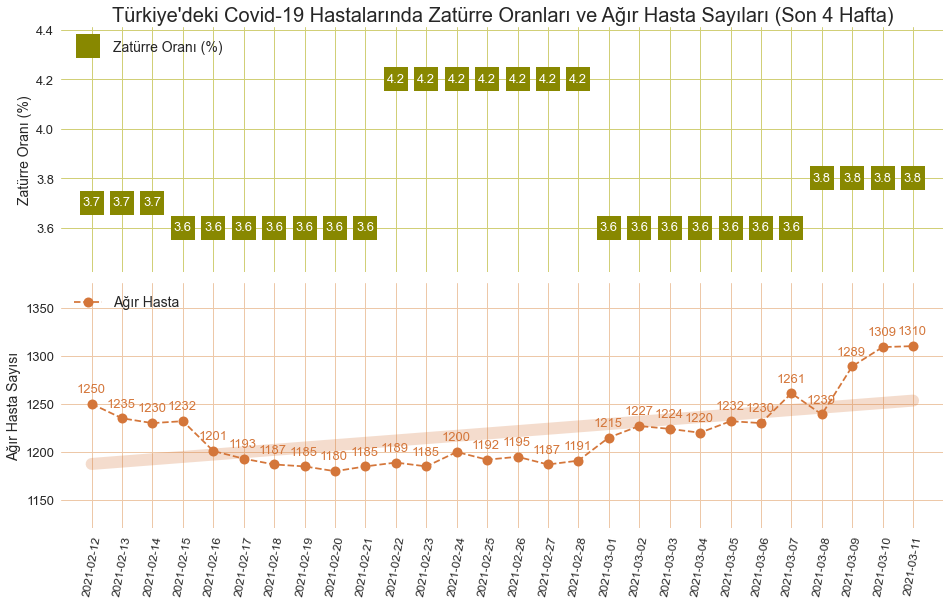

In [87]:
plt.figure(figsize=(13.5,8.5))
lm = len(covid19TR)-28
plt.subplot(2,1,1)
plt.plot(covid19TR.index[lm:], covid19TR.iloc[lm:,6], linestyle=' ', marker='s', markersize=24,
         label='Zatürre Oranı (%)', color='#888800')
for i in range(lm, len(covid19TR)):
    plt.text(i-lm-0.3, covid19TR.iloc[i,6]-0.01, covid19TR.iloc[i,6], fontsize=13, color='white')
plt.axis([-1, len(covid19TR.index[lm:]), covid19TR.iloc[lm:,6].min()*0.95, covid19TR.iloc[lm:,6].max()*1.05])
plt.title('Türkiye\'deki Covid-19 Hastalarında Zatürre Oranları ve Ağır Hasta Sayıları (Son 4 Hafta)', fontsize=20)
plt.ylabel('Zatürre Oranı (%)', fontsize=14)
plt.xticks(covid19TR.index[lm:], ['' for _ in range(len(covid19TR.index[lm:]))])
plt.yticks(fontsize=13)
plt.grid(color='#d1cf77')
plt.legend(loc='upper left', fontsize=14)
         
plt.subplot(2,1,2)
slp, intcp = np.polyfit(list(range(28)), covid19TR['Ağır Hasta'][-28:], 1)
plt.plot(covid19TR.index[lm:], covid19TR.iloc[lm:,7], linestyle='--', marker='o', markersize=10,
         label='Ağır Hasta', color='#d4763a')
plt.plot([0, 27],[intcp, intcp+(slp*27)], color='#d4763a', alpha=0.25, linewidth=12)
for i in range(lm,len(covid19TR)):
    plt.text(i-lm-0.5, covid19TR.iloc[i,7]+12, int(covid19TR.iloc[i,7]), fontsize=13, color='#d4763a')
plt.axis([-1, len(covid19TR.index[lm:]), covid19TR.iloc[lm:,7].min()*0.95, covid19TR.iloc[lm:,7].max()*1.05])
plt.ylabel('Ağır Hasta Sayısı', fontsize=14)
plt.xticks(rotation=80, fontsize=12)
plt.yticks(fontsize=13)
plt.grid(color='#edc8a8')
plt.legend(loc='upper left', fontsize=14)
plt.tight_layout()
plt.show()

**Son 4 hafta için hastalardaki zatürre oranları ve ağır hasta sayıları için;**

_Hastalarda Zatürre Oranı,_ sırayla **%3.7**, **%3.6**, **%4.2**, **%3.6** ve son olarak **%3.8** şeklinde ölçülmüştür.

**Not:** Bu oranların _haftalık_ bazda verildiği ve ilgili günlerde dolayısıyla aynı olarak kaldığı dikkate alınmalıdır.

_Ağir Hasta Sayısı,_ 20 Şubat 2021'de **1180** ile en düşük seviye görülse de ilerleyen günlerde önce hafif dalgalanmalar olup sonra da **yükselişe geçerek** 11 Mart 2021'de **1310**'a kadar ulaşmıştır!

### Hasta, Vefat, İyileşen, Test ve Vaka Artışlarının Aylık Toplamları

In [88]:
analiz_sutunlar = ['Hasta Artış', 'Vefat Artış', 'İyileşen Artış', 'Test Artış', 'Günlük Vaka',
                   'Hasta +/-', 'Vefat +/-', 'İyileşen +/-', 'Test +/-', 'Vaka +/-']
covid19TR = covid19TR.reset_index()
covid19TR['Tarih'] = pd.to_datetime(covid19TR['Tarih'])
covid19TR_haftalik_toplam = covid19TR.resample('M', on='Tarih')[analiz_sutunlar[:5]].sum()
covid19TR_haftalik_toplam

,Hasta Artış,Vefat Artış,İyileşen Artış,Test Artış,Günlük Vaka
Tarih,,,,,
2020-03-31,13530,214,243,92403,0
2020-04-30,106673,2960,48643,941214,0
2020-05-31,43738,1366,79087,1005577,0
2020-06-30,35964,591,45138,1342456,0
2020-07-31,30967,560,41424,1419173,0
2020-08-31,39260,679,30391,2337669,0
2020-09-30,48530,1825,34823,3241769,0
2020-10-31,56704,2057,44222,3621553,0
2020-11-30,125498,3494,80756,4590478,177931


### Aynı Sütunların ve Değişimlerinin Aylık Ortalamaları

In [89]:
covid19TR_haftalik_ortalama = covid19TR.resample('M', on='Tarih')[analiz_sutunlar].mean().fillna(0)
round(covid19TR_haftalik_ortalama, 2)

,Hasta Artış,Vefat Artış,İyileşen Artış,Test Artış,Günlük Vaka,Hasta +/-,Vefat +/-,İyileşen +/-,Test +/-,Vaka +/-
Tarih,,,,,,,,,,
2020-03-31,644.29,10.19,11.57,4400.14,0.00,128.76,2.19,3.86,734.38,0.00
2020-04-30,3555.77,98.67,1621.43,31373.80,0.00,-2.97,1.57,159.43,886.07,0.00
2020-05-31,1410.90,44.06,2551.19,32437.97,0.00,-57.29,-2.19,-125.00,-206.58,0.00
2020-06-30,1198.80,19.70,1504.60,44748.53,0.00,15.13,-0.30,10.43,496.40,0.00
2020-07-31,998.94,18.06,1336.26,45779.77,0.00,-10.03,0.03,-9.87,-129.03,0.00
2020-08-31,1266.45,21.90,980.35,75408.68,0.00,19.52,0.87,2.94,2051.94,0.00
2020-09-30,1617.67,60.83,1160.77,108058.97,0.00,-6.53,0.70,5.27,66.53,0.00
2020-10-31,1829.16,66.35,1426.52,116824.29,0.00,26.52,0.32,8.42,387.45,0.00
2020-11-30,4183.27,116.47,2691.87,153015.93,5931.03,143.37,3.77,99.30,1751.57,1040.63


### Sonuç olarak;

**Yukarıdaki analizlerde tüm bu rakamlar ve görseller şunu işaret ediyor ki Türkiye'de bir yıldır süren Koronavirüs riskinin normalleşmeye rağmen DEVAM ETTİĞİ ve zaman zaman YÜKSEK OLDUĞU söylenebilir! Yani, tedbirlere uyulmadığı müddetçe tekrar önceki aylardaki duruma geri dönebiliriz!**

**Dolayısıyla, virüsün yayılmasına engel olmak için asla ve asla virüs yokmuş gibi davranmamaya; kendimizi, sevdiklerimizi ve etrafımızdaki insanları önemseyerek önlemlerimizi alarak kontrollü yaşamaya devam edelim. Zorunlu kalmadıkça dışarı çıkmamaya; eğer dışarıdaysak maske takmaya, dezenfaktan kullanmaya, kalabalık ortamlarda fazla kalmamaya ve açık/kapalı alanlarda sosyal mesafeyi korumaya LÜTFEN özen gösterelim! Tabi, hafta içi her akşam ve varsa hafta sonu kısıtlamalarına mutlaka riayet edelim!**

## Koronavirüsü tamamen yendiğimiz günlerde buluşmak dileğiyle...